# <b> Project on Census Income Classification

Link to Dataset: https://archive.ics.uci.edu/ml/datasets/Census+Income

- income (target feature/label): Indicates whether an individual earns more than $50,000 annually. Categories: <= 50K, >50K.
- age: Represents the age of an individual. It is an integer greater than 0.
- workclass: Describes the employment status of an individual. Categories: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: Indicates the number of people the census believes the entry represents. People with similar demographic characteristics are assigned similar weights. This applies within each state due to the nature of the CPS sample. It is an integer greater than 0.
- education: Represents the highest level of education attained by an individual. Categories: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: Represents the highest level of education attained in - numerical form. It is an integer greater than 0.
- marital-status: Describes the marital status of an individual. Categories: Married-civ-spouse (civilian spouse), Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse (spouse in the Armed Forces).
- occupation: Indicates the general type of occupation of an individual. Categories: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Represents the individual's relationship to others. For example, an individual can be a Husband. Each entry has only one relationship attribute. Categories: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: Describes an individual's race. Categories: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Indicates the biological sex of the individual. Categories: Male, Female.
- capital-gain: Represents the capital gains for an individual. It is an integer greater than or equal to 0.
- capital-loss: Represents the capital loss for an individual. It is an integer greater than or equal to 0.
- hours-per-week: Indicates the number of hours an individual reported working per week. It is a continuous value.
- native-country: Represents the country of origin for an individual. - Categories: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.






### Importing Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report


from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [44]:
index=["age",	"workclass",	"fnlwgt",	"education"	,"educational-num"	,"marital-status"	,"occupation"	,"relationship",	"race"	,"gender"	,"capital-gain"	,"capital-loss",	"hours-per-week",	"native-country"	,"income"]
data = pd.read_csv("adult.data", header=None,names=index)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [45]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Several observations can be made about the dataset's numerical features. The dataset contains 32,561 samples or instances.

For the 'age' column, the mean age is approximately 38.58, with a standard deviation of around 13.64. The minimum age in the dataset is 17, while the maximum age is 90.

The 'fnlwgt' column represents a continuous variable. The mean value for this feature is approximately 189,778.4, with a standard deviation of roughly 105,550. The minimum 'fnlwgt' value is 12,285, while the maximum value is 1,484,705.

The 'educational-num' column denotes the number of years of education completed by individuals. The mean educational number is approximately 10.08, with a standard deviation of around 2.57. The minimum value is 1, indicating the completion of only one year of education, while the maximum value is 16.

The 'capital-gain' and 'capital-loss' columns represent financial attributes. The mean capital gain is approximately 1,077.65, with a standard deviation of about 7,385.29. The minimum value is 0, while the maximum value is 99,999. Regarding capital losses, the mean is approximately 87.30, with a standard deviation of roughly 402.96. The minimum capital loss is 0, while the maximum is 4,356.

Lastly, the 'hours-per-week' column indicates the number of hours worked per week. The mean hours per week is approximately 40.44, with a standard deviation of about 12.35. The minimum value is 1, representing extremely low working hours, while the maximum value is 99, indicating long working hours.

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [47]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

- There are no null values in the data

In [48]:
print('Continous variables in the dataset are: ')
cont = []
for i in data.columns:
    if(data[i].dtype=='int64'):
        
        cont.append(i)
        print(i,end=',')
print('\n\nCategorical variable in the dataset are: ')
catg=[]
for i in data.columns:
    if data[i].dtype=='O':
        
        catg.append(i)
        print(i,end=', ')


Continous variables in the dataset are: 
age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,

Categorical variable in the dataset are: 
workclass, education, marital-status, occupation, relationship, race, gender, native-country, income, 

In [49]:
data.income.describe()

count      32561
unique         2
top        <=50K
freq       24720
Name: income, dtype: object

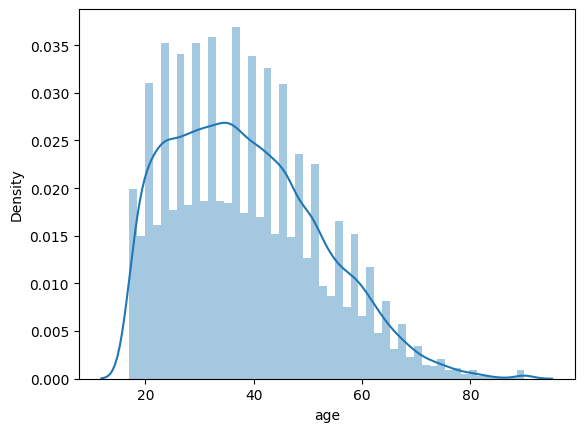

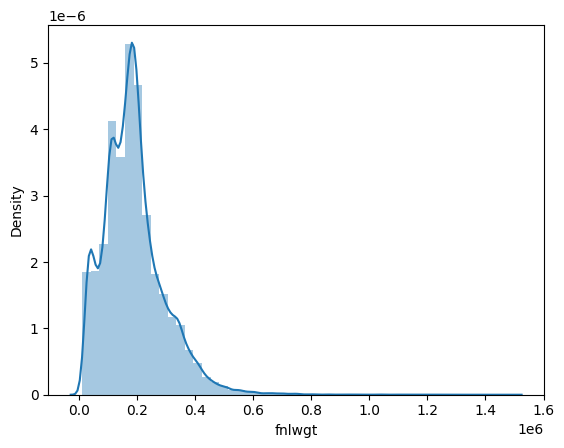

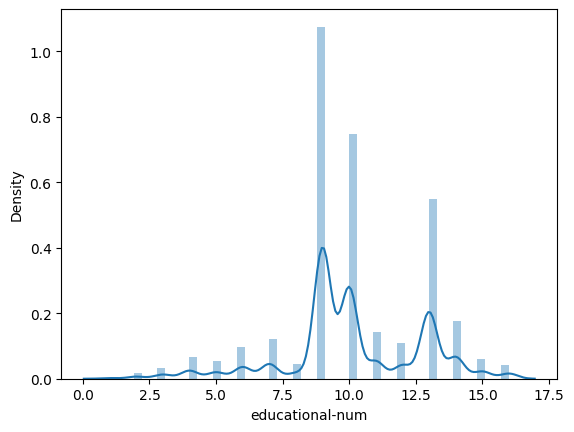

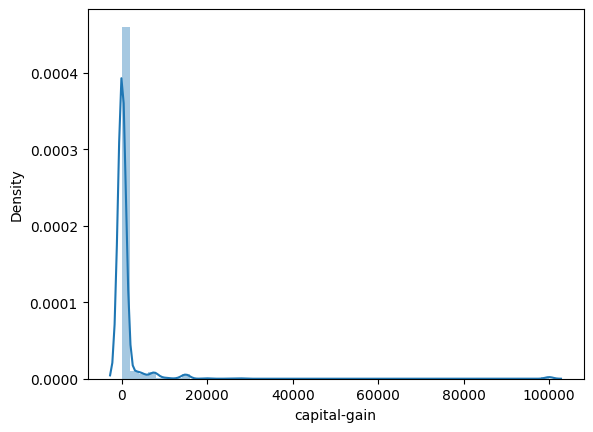

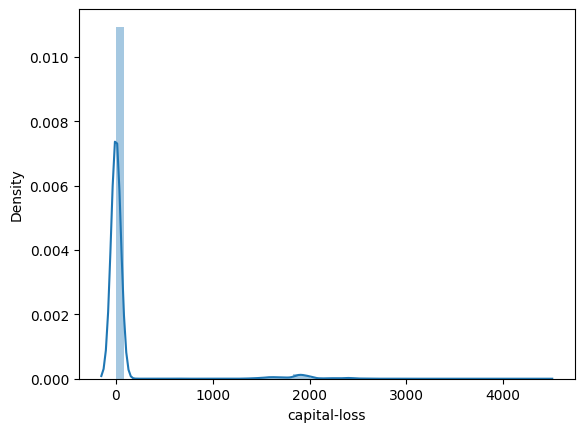

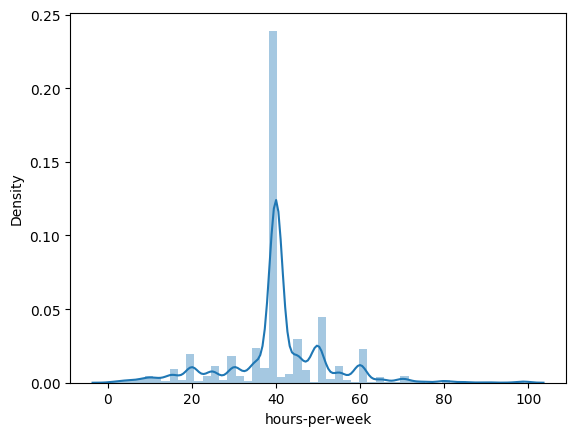

In [50]:
for i in cont:
    sns.distplot(data[i])
    plt.show()

In [51]:
for i in catg:
    print(data[i].value_counts())
    print("-"*15)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
---------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
---------------
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64
---------------
 Prof-specialty       

Below observations can be noted from the above output

The "workclass" feature has several categories, with the most common being "Private" with 22,696 occurrences. The second most frequent category is "Self-emp-not-inc" with 2,541 occurrences, followed by "Local-gov" with 2,093 occurrences. There are also 1,836 instances where the workclass is marked as "?" indicating missing or unknown values. Other categories include "State-gov" (1,298), "Self-emp-inc" (1,116), "Federal-gov" (960), "Without-pay" (14), and "Never-worked" (7).

Moving on to the "education" feature, the most frequent category is "HS-grad" with 10,501 occurrences, followed by "Some-college" with 7,291 occurrences. "Bachelors" is the third most common category with 5,355 occurrences, and "Masters" is the fourth with 1,723 occurrences. Other categories include "Assoc-voc" (1,382), "11th" (1,175), "Assoc-acdm" (1,067), "10th" (933), "7th-8th" (646), "Prof-school" (576), "9th" (514), "12th" (433), "Doctorate" (413), "5th-6th" (333), "1st-4th" (168), and "Preschool" (51).

For the "marital-status" feature, the most common category is "Married-civ-spouse" with 14,976 occurrences, followed by "Never-married" with 10,683 occurrences. "Divorced" is the third most frequent category with 4,443 occurrences, and "Separated" has 1,025 occurrences. "Widowed" has 993 occurrences, "Married-spouse-absent" has 418 occurrences, and "Married-AF-spouse" has the least occurrences with 23 instances.

The "occupation" feature has multiple categories as well, with "Prof-specialty" being the most frequent category, occurring 4,140 times. "Craft-repair" is the second most common category with 4,099 occurrences, followed by "Exec-managerial" with 4,066 occurrences. "Adm-clerical" has 3,770 occurrences, "Sales" has 3,650 occurrences, and "Other-service" has 3,295 occurrences. There are 1,843 instances where the occupation is marked as "?" denoting unknown values. Other categories include "Machine-op-inspct" (2,002), "Transport-moving" (1,597), "Handlers-cleaners" (1,370), "Farming-fishing" (994), "Tech-support" (928), "Protective-serv" (649), "Priv-house-serv" (149), and "Armed-Forces" (9).

The "relationship" feature describes the relationship status of individuals. The most common category is "Husband" with 13,193 occurrences, followed by "Not-in-family" with 8,305 occurrences. "Own-child" has 5,068 occurrences, "Unmarried" has 3,446 occurrences, "Wife" has 1,568 occurrences, and "Other-relative" has 981 occurrences.

In the "race" feature, the majority of individuals are categorized as "White" with 27,816 occurrences. "Black" is the second most common category with 3,124 occurrences, followed by "Asian-Pac-Islander" (1,039), "Amer-Indian-Eskimo" (311), and "Other" (271).

The "gender" feature indicates the gender of individuals, with "Male" occurring 21,790 times and "Female" occurring 10,771 times.

The "native-country" feature represents the country of origin or citizenship. The most common category is "United-States" with 29,170 occurrences. "Mexico" has 643 occurrences, while there are 583 instances marked as "?". Other categories include "Philippines" (198), "Germany" (137), "Canada" (121), "Puerto-Rico" (114), "El-Salvador" (106), "India" (100), "Cuba" (95), "England" (90), "Jamaica" (81), "South" (80), "China" (75), "Italy" (73), "Dominican-Republic" (70), "Vietnam" (67), "Guatemala" (64), "Japan" (62), "Poland" (60), "Columbia" (59), "Taiwan" (51), "Haiti" (44), "Iran" (43), "Portugal" (37), "Nicaragua" (34), "Peru" (31), "France" (29), "Greece" (29), "Ecuador" (28), "Ireland" (24), "Hong" (20), "Cambodia" (19), "Trinadad&Tobago" (19), "Laos" (18), "Thailand" (18), "Yugoslavia" (16), "Outlying-US(Guam-USVI-etc)" (14), "Honduras" (13), "Hungary" (13), "Scotland" (12), and "Holand-Netherlands" (1).

Finally, the "income" feature categorizes individuals into two groups: "<=50K" indicating an income of 50,000 or less, and ">50K" indicating an income greater than 50,000. There are 24,720 instances in the "<=50K" category and 7,841 instances in the ">50K" category.

<Axes: xlabel='income'>

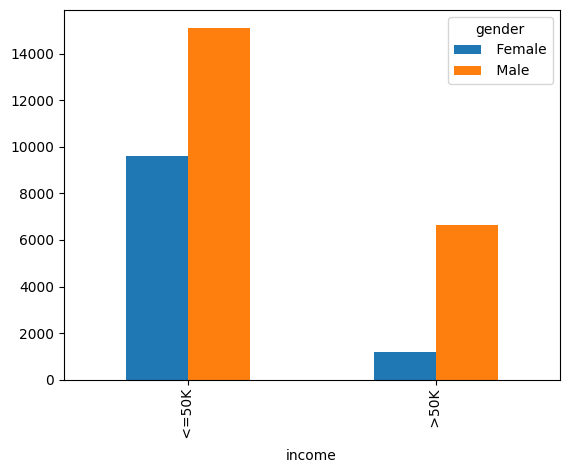

In [52]:
class_sex = pd.crosstab(data['income'],data['gender'])
class_sex.plot(kind='bar')

It is observed that most number of males have both higher salaries as well as lower salaries

<Axes: xlabel='income'>

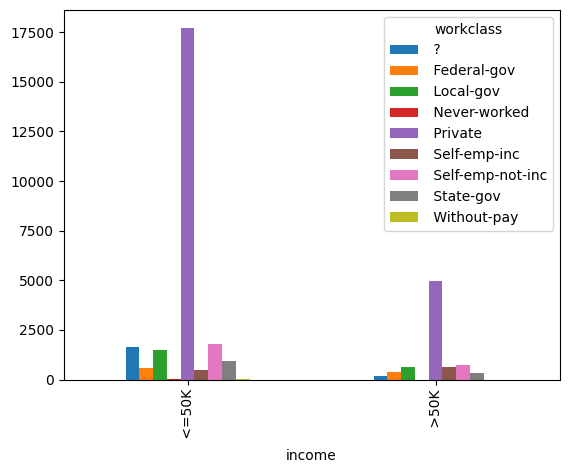

In [53]:
#cheacking distribution of people in workclass according to salary
class_salary = pd.crosstab(data['income'],data['workclass'])
class_salary.plot(kind='bar')

Private sector people have higher salaries as compared to any other.

<Axes: xlabel='education'>

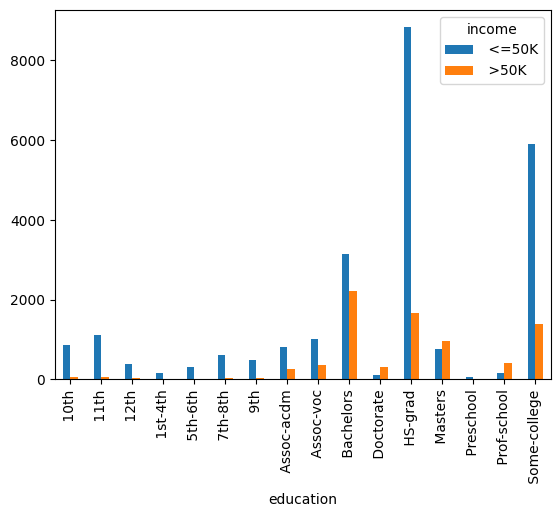

In [54]:
#cheacking distribution of people according to salary
salary_education = pd.crosstab(data['education'],data['income'])
salary_education.plot(kind='bar')

Higher study grads have higher income than any other people.

In [55]:
cat_col=[]
for i in data.columns:
    if data[i].dtype=='object':
        cat_col.append(i)
        
cat_col      

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

<Figure size 640x480 with 0 Axes>

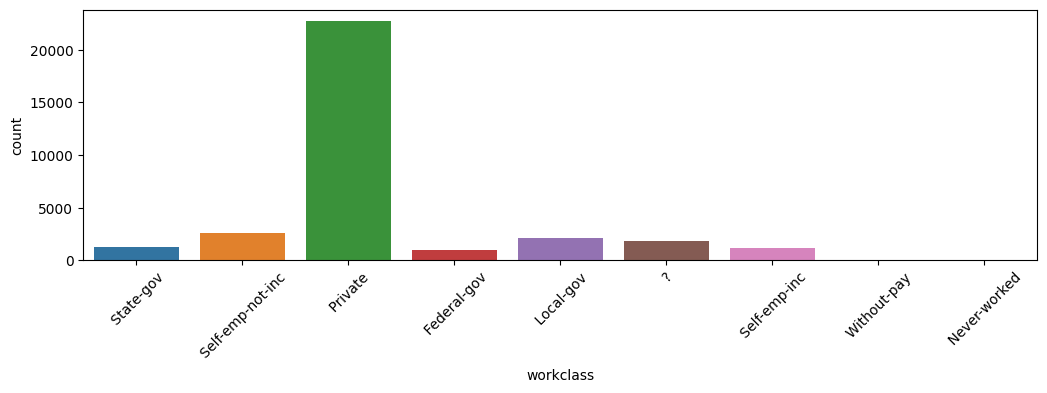

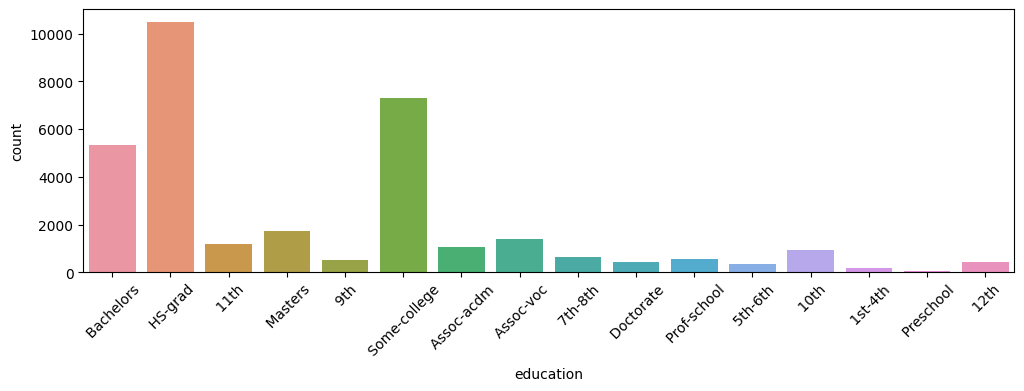

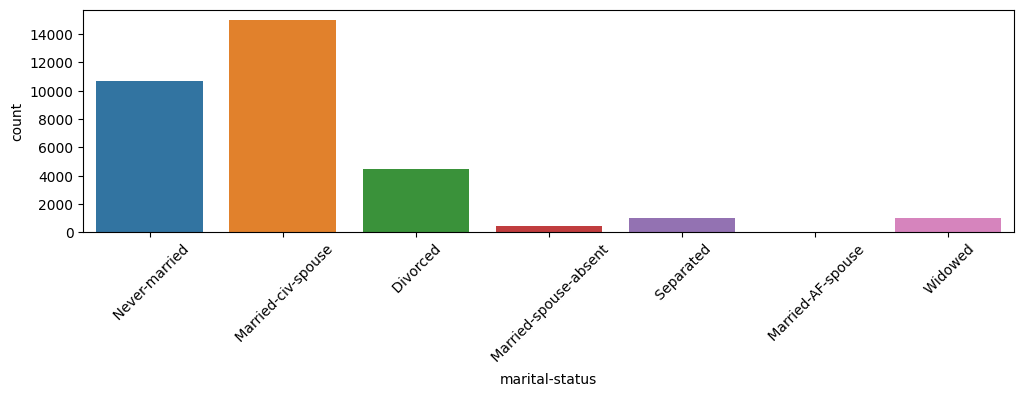

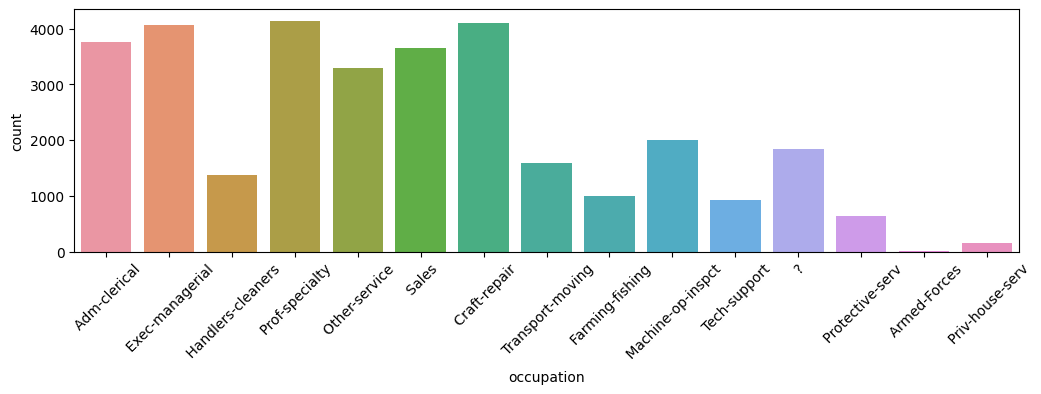

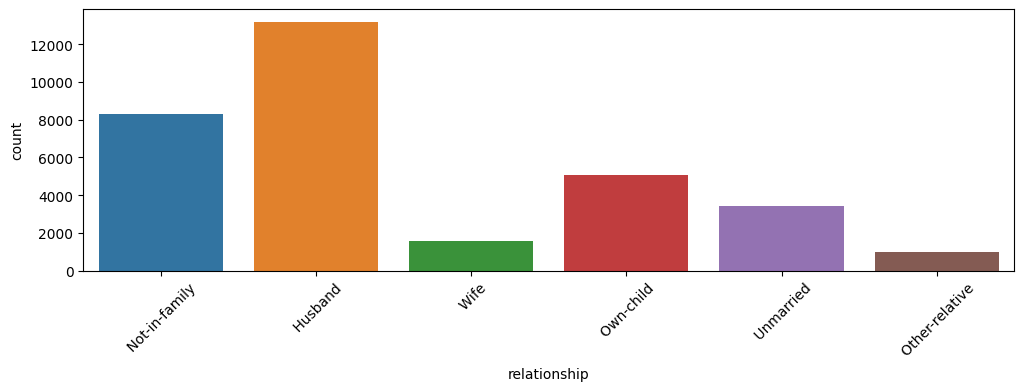

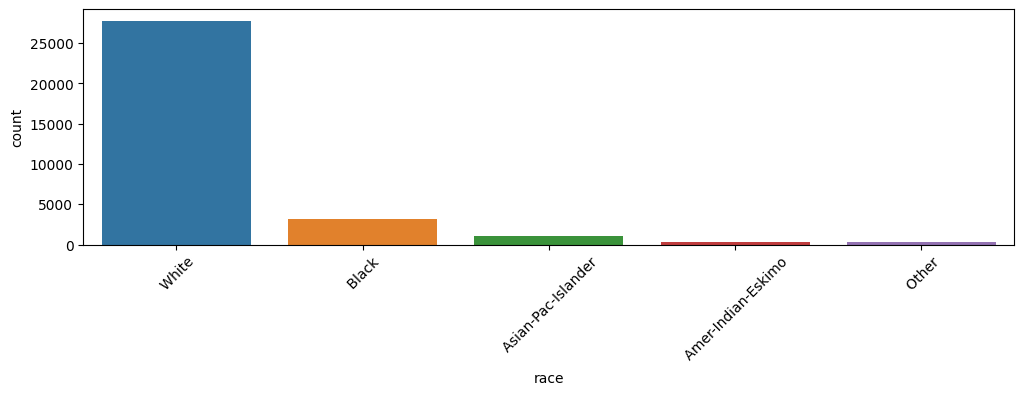

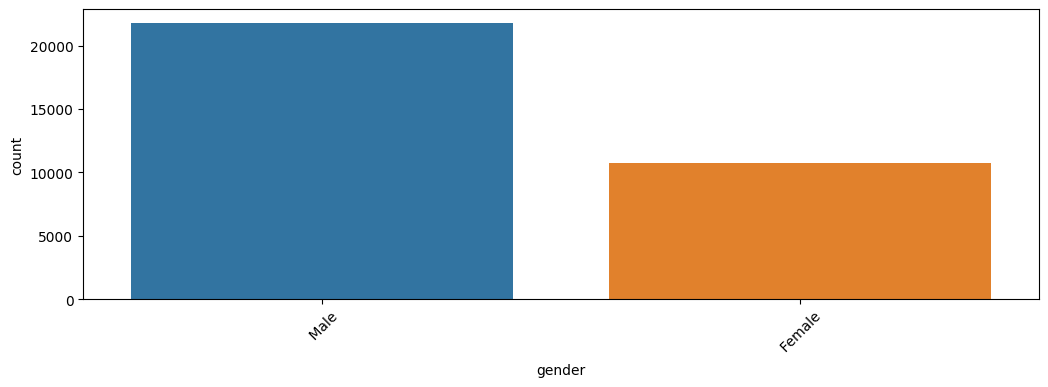

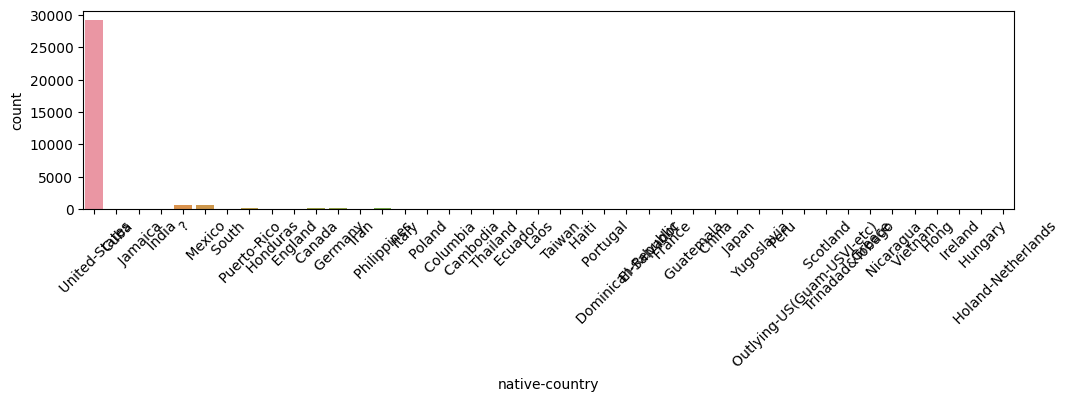

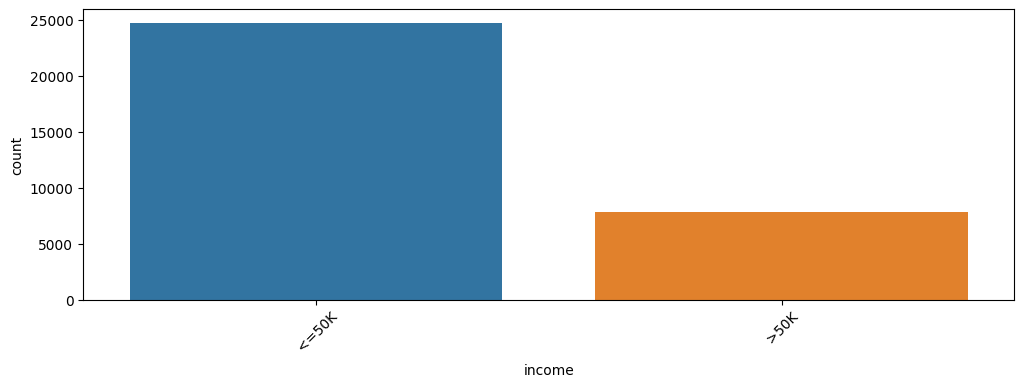

In [56]:
# categorical columns
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_col)):
    plt.figure(figsize=(30, 30))
    plt.subplot(8, 3, i+1)
    sns.countplot(x=data[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

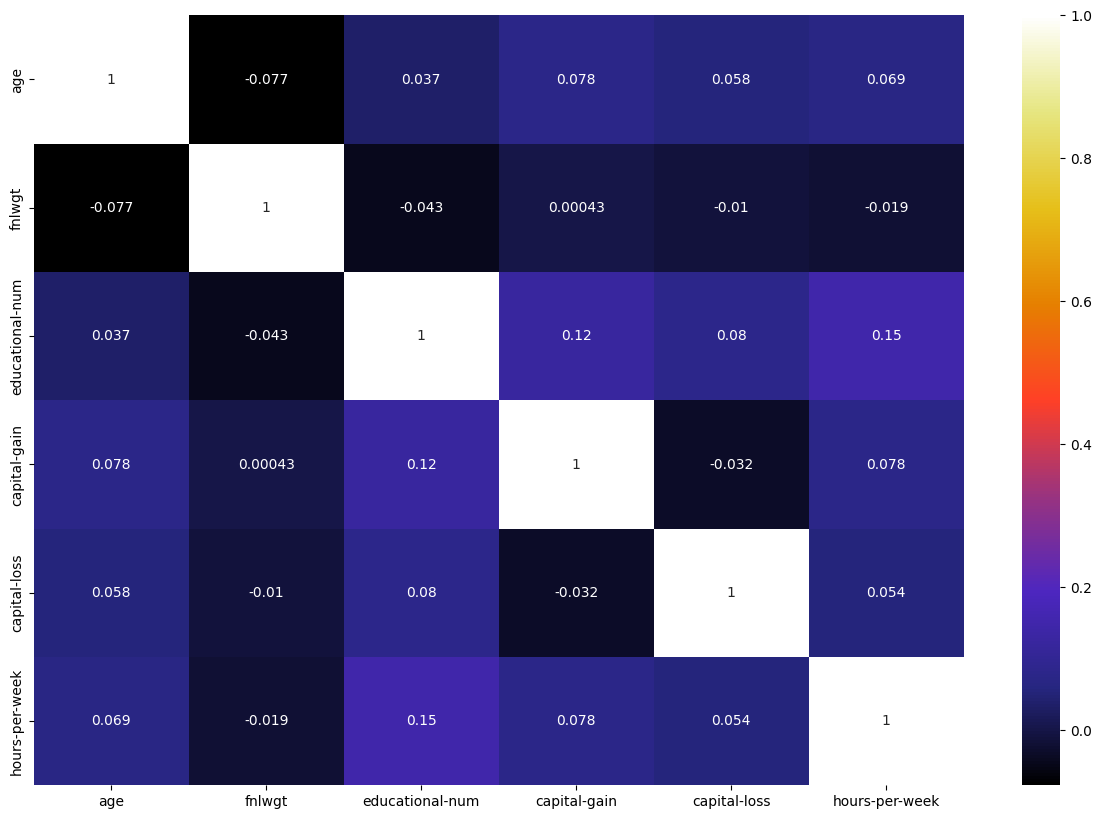

In [57]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap="CMRmap", annot=True)
plt.show()

Analyzing the correlations, we observe that the variable "age" has a positive correlation with "educational-num," "capital-gain," "capital-loss," and "hours-per-week." This implies that as the age increases, there is a tendency for these variables to increase as well.

The "fnlwgt" variable, which represents the final weight assigned to each record in the dataset, shows a negative correlation with "age," indicating that as the age increases, the assigned weight tends to decrease.

Furthermore, the "educational-num" variable exhibits a positive correlation with "capital-gain," "capital-loss," and "hours-per-week," suggesting that individuals with higher educational numbers tend to have higher values for these variables.

The variables "capital-gain" and "capital-loss" display a weak positive correlation with "age" and "educational-num." This suggests that as age or educational number increases, there is a slight tendency for capital gains and losses to increase as well.

Lastly, the "hours-per-week" variable demonstrates a positive correlation with "educational-num" and "capital-gain." This indicates that individuals who work more hours per week tend to have higher educational numbers and capital gains.

In [58]:
#numeric columns
num_col=['age', 'fnlwgt','educational-num','hours-per-week']

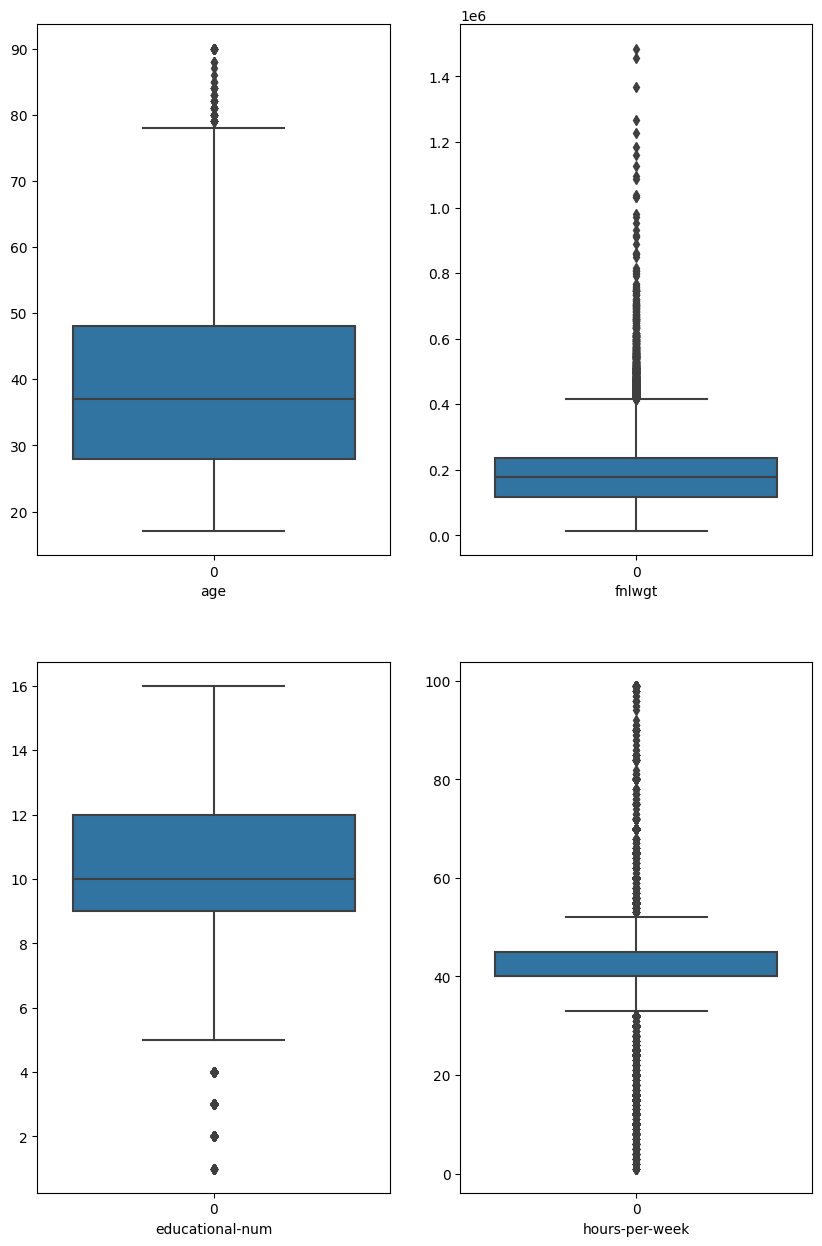

In [59]:
plt.figure(figsize=(10,40))
for i in range(0,len(num_col)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=data[num_col[i]])
    plt.xlabel(num_col[i])

There are some outliers present in the numerical columns so we will be removing the outliers from the data using the quantile method

<b> Treating outliers

In [60]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].mean()
        dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].mean()

In [61]:
replace_with_thresholds(data,num_col)

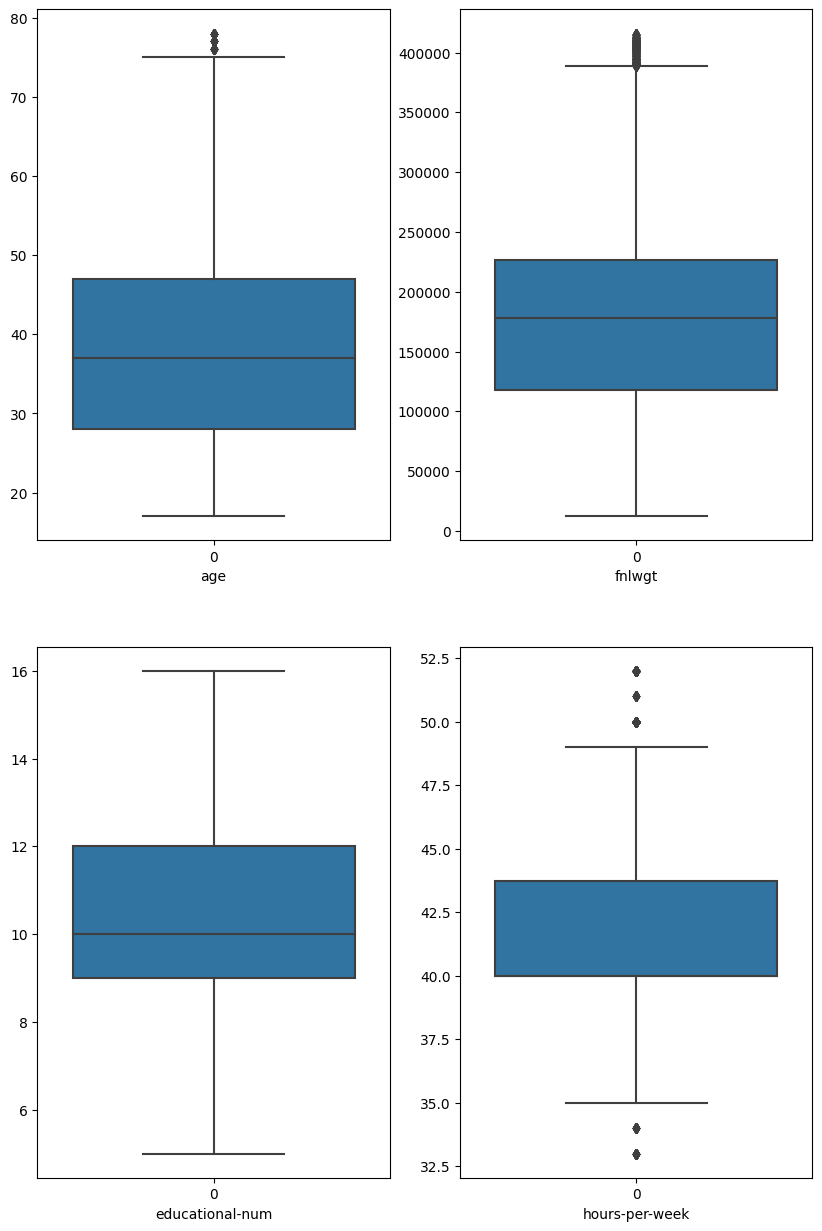

In [62]:
plt.figure(figsize=(10,40))
for i in range(0,len(num_col)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=data[num_col[i]])
    plt.xlabel(num_col[i])

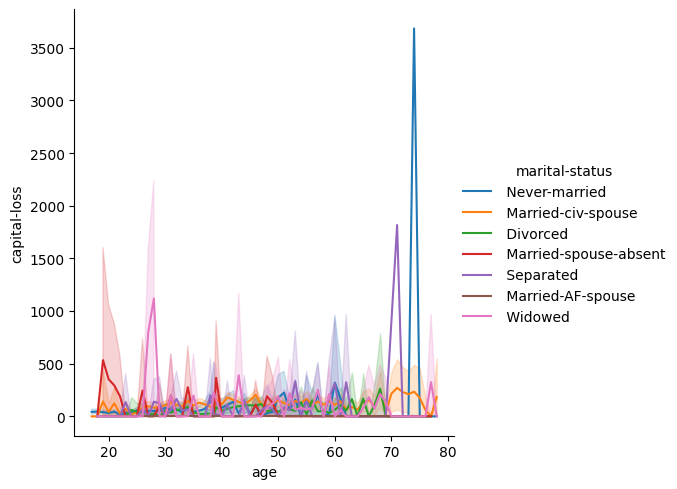

In [63]:
sns.relplot(data=data, x="age", y="capital-loss",hue='marital-status', kind="line")

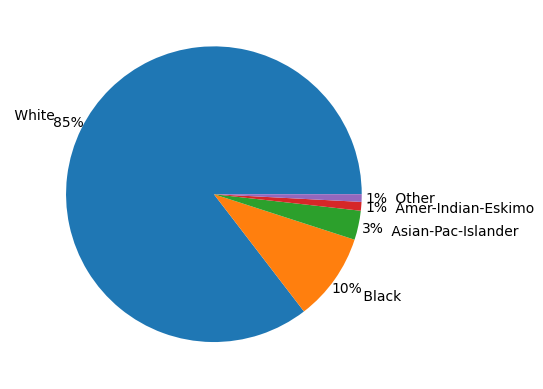

In [64]:
plt.pie(data.race.value_counts(), labels=data.race.value_counts().index, autopct='%.0f%%', labeldistance=1.2, pctdistance=1.1);

Most of the data belongs to white people and there are lesser percentage from other races

In [66]:
data.groupby("gender")["age"].mean()

gender
 Female    36.675611
 Male      39.226212
Name: age, dtype: float64

Mean male age is 39 and mean female age is 36

In [67]:
data = data.replace('?' , np.NaN)

In [70]:
data = data.drop_duplicates(keep= 'first')

### Feature Engineering

In [72]:
from sklearn.preprocessing import LabelEncoder

# Specify the categorical columns to be label encoded
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Loop through the categorical columns and encode their values
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])



In [73]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,7,77516.0,9,13.0,4,1,1,4,1,2174,0,40.000000,39,0
1,50.0,6,83311.0,9,13.0,2,4,0,4,1,0,0,40.437456,39,0
2,38.0,4,215646.0,11,9.0,0,6,1,4,1,0,0,40.000000,39,0
3,53.0,4,234721.0,1,7.0,2,6,0,2,1,0,0,40.000000,39,0
4,28.0,4,338409.0,9,13.0,2,10,5,2,0,0,0,40.000000,5,0


In [74]:
data.income.value_counts()

0    24678
1     7837
Name: income, dtype: int64

- As the data is imbalanced, we will try to use SMOTE to handle the imbalance

In [75]:
# Split the data into train and test

X= data.drop('income', axis=1)
y = data['income']

from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [76]:
X_train.shape,y_train.shape

((26012, 14), (26012,))

### Modeling

#### Train models on original data

In [78]:

# Train and test the models on the original data
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

results = {'Model': [], 'Train Accuracy': [], 'Test Accuracy': [], 'Precision': [], 'Recall': []}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    
    results['Model'].append(model_name)
    results['Train Accuracy'].append(train_acc)
    results['Test Accuracy'].append(test_acc)
    results['Precision'].append(precision)
    results['Recall'].append(recall)


#### Train and evaluate on balanced data

In [79]:
# Train and test the models on the balanced data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [80]:
for model_name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    train_pred_balanced = model.predict(X_train_balanced)
    test_pred_balanced = model.predict(X_test)
    
    train_acc_balanced = accuracy_score(y_train_balanced, train_pred_balanced)
    test_acc_balanced = accuracy_score(y_test, test_pred_balanced)
    precision_balanced = precision_score(y_test, test_pred_balanced)
    recall_balanced = recall_score(y_test, test_pred_balanced)
    
    results['Model'].append(model_name + ' (Balanced)')
    results['Train Accuracy'].append(train_acc_balanced)
    results['Test Accuracy'].append(test_acc_balanced)
    results['Precision'].append(precision_balanced)
    results['Recall'].append(recall_balanced)

In [81]:
# Results dataframe
df_results = pd.DataFrame(results)
df_results

,Model,Train Accuracy,Test Accuracy,Precision,Recall
0,Logistic Regression,0.797440,0.801322,0.760911,0.255903
1,Decision Tree,0.999923,0.813471,0.607795,0.636886
2,Random Forest,0.999923,0.859449,0.746788,0.630504
3,SVM,0.795748,0.797939,0.966790,0.167198
4,Naive Bayes,0.793518,0.799938,0.681199,0.319081
5,Logistic Regression (Balanced),0.737489,0.726126,0.456327,0.713465
6,Decision Tree (Balanced),0.999949,0.804859,0.589436,0.626675
7,Random Forest (Balanced),0.999924,0.852991,0.704348,0.671985
8,SVM (Balanced),0.591632,0.802091,0.860825,0.213146
9,Naive Bayes (Balanced),0.624683,0.795787,0.657030,0.319081


In the conducted experiments, several classification models were evaluated based on their performance metrics. The logistic regression model achieved a training accuracy of 79.74% and a test accuracy of 80.13%. The precision score for this model was 76.09%, indicating the proportion of true positive predictions among all positive predictions, while the recall score was 25.59%, representing the proportion of true positive predictions among all actual positive instances.

The decision tree model exhibited high accuracy during training, achieving a near-perfect score of 99.99%. However, its performance on the test data was slightly lower, with an accuracy of 81.35%. The precision score for the decision tree model was 60.78%, and the recall score was 63.69%.

The random forest model also demonstrated a high training accuracy of 99.99% but performed better on the test data with an accuracy of 85.94%. The precision score for this model was 74.68%, and the recall score was 63.05%.

The support vector machine (SVM) model achieved a training accuracy of 79.57% and a test accuracy of 79.79%. It exhibited a high precision score of 96.68%, indicating a high proportion of true positive predictions, while the recall score was relatively low at 16.72%.

The naive Bayes model achieved a training accuracy of 79.35% and a test accuracy of 79.99%. Its precision score was 68.12%, and the recall score was 31.91%.

Additionally, balanced versions of the models were evaluated, which aimed to address class imbalance issues in the dataset. The logistic regression (balanced) model achieved a training accuracy of 73.75% and a test accuracy of 72.61%. The precision score for this model was 45.63%, and the recall score was 71.35%.

The decision tree (balanced) model showed a high training accuracy of 99.99% and a test accuracy of 80.49%. Its precision score was 58.94%, and the recall score was 62.67%.

The random forest (balanced) model achieved a training accuracy of 99.99% and a test accuracy of 85.29%. The precision score for this model was 70.43%, and the recall score was 67.20%.

The SVM (balanced) model achieved a training accuracy of 59.16% and a test accuracy of 80.20%. Its precision score was 86.08%, and the recall score was 21.31%.

Lastly, the naive Bayes (balanced) model achieved a training accuracy of 62.47% and a test accuracy of 79.58%. The precision score for this model was 65.70%, and the recall score was 31.91%.

Logistic Regression:
Confusion Matrix:
[[3604 1332]
 [ 449 1118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      4936
           1       0.46      0.71      0.56      1567

    accuracy                           0.73      6503
   macro avg       0.67      0.72      0.68      6503
weighted avg       0.78      0.73      0.74      6503



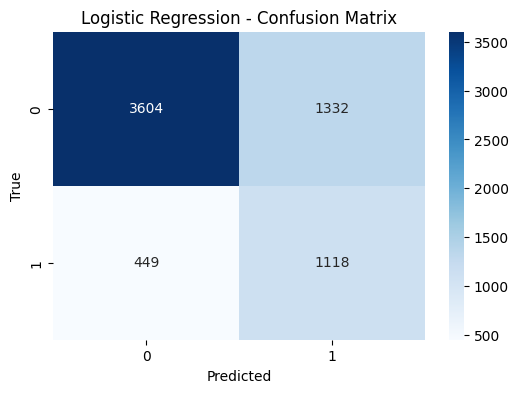

---

Decision Tree:
Confusion Matrix:
[[4252  684]
 [ 585  982]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4936
           1       0.59      0.63      0.61      1567

    accuracy                           0.80      6503
   macro avg       0.73      0.74      0.74      6503
weighted avg       0.81      0.80      0.81      6503



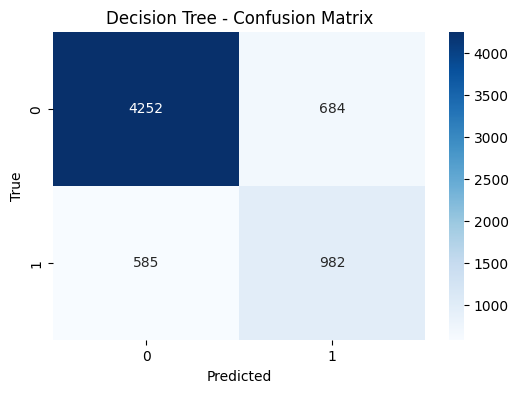

---

Random Forest:
Confusion Matrix:
[[4494  442]
 [ 514 1053]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4936
           1       0.70      0.67      0.69      1567

    accuracy                           0.85      6503
   macro avg       0.80      0.79      0.80      6503
weighted avg       0.85      0.85      0.85      6503



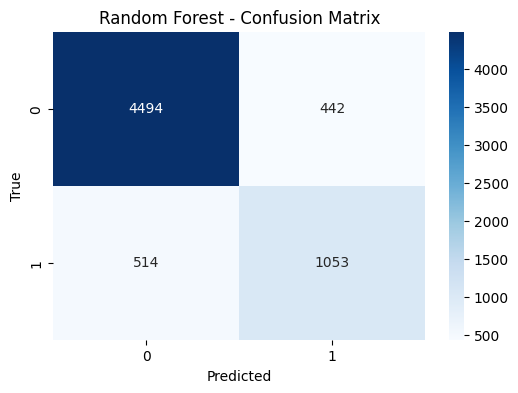

---

SVM:
Confusion Matrix:
[[4882   54]
 [1233  334]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      4936
           1       0.86      0.21      0.34      1567

    accuracy                           0.80      6503
   macro avg       0.83      0.60      0.61      6503
weighted avg       0.81      0.80      0.75      6503



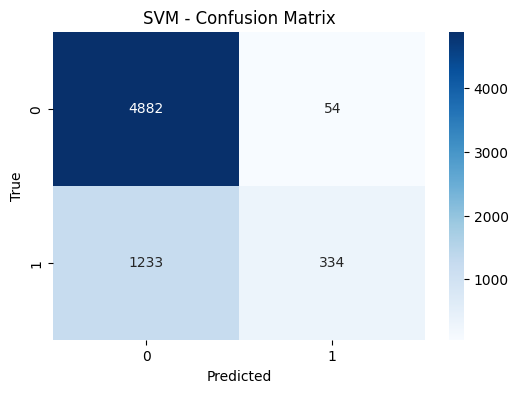

---

Naive Bayes:
Confusion Matrix:
[[4675  261]
 [1067  500]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      4936
           1       0.66      0.32      0.43      1567

    accuracy                           0.80      6503
   macro avg       0.74      0.63      0.65      6503
weighted avg       0.78      0.80      0.77      6503



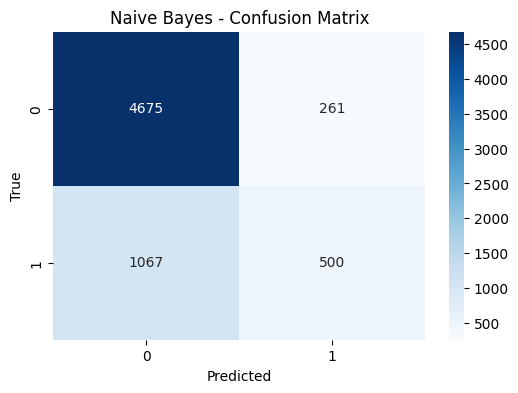

---



In [83]:
# Generate confusion matrices and classification reports
for model_name, model in models.items():
    print(model_name + ':')
    print('Confusion Matrix:')
    cm = confusion_matrix(y_test, model.predict(X_test))
    print(cm)
    print('Classification Report:')
    print(classification_report(y_test, model.predict(X_test)))
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(model_name + ' - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print('---\n')

From the above observations, the random forest balanced seem to be the best model so we will use this model for hyperparameter tuning

In [85]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)

# Obtain the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluation
y_pred = best_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Displaying the classification report
print(classification_rep)


              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4936
           1       0.72      0.70      0.71      1567

    accuracy                           0.86      6503
   macro avg       0.81      0.80      0.81      6503
weighted avg       0.86      0.86      0.86      6503



In [92]:
y_pred_train = best_model.predict(X_train_balanced)
train_acc_balanced = accuracy_score(y_train_balanced, train_pred_balanced)
test_acc_balanced = accuracy_score(y_test, y_pred)
precision_balanced = precision_score(y_test, y_pred)
recall_balanced = recall_score(y_test, y_pred)
print("Train accuracy: ",train_acc_balanced)
print("Test accuracy: ",test_acc_balanced)
print("Recall: ", recall_balanced)
print("Precision: ",precision_balanced)


Train accuracy:  0.6246834160672677
Test accuracy:  0.8602183607565739
Recall:  0.6968730057434588
Precision:  0.7155963302752294


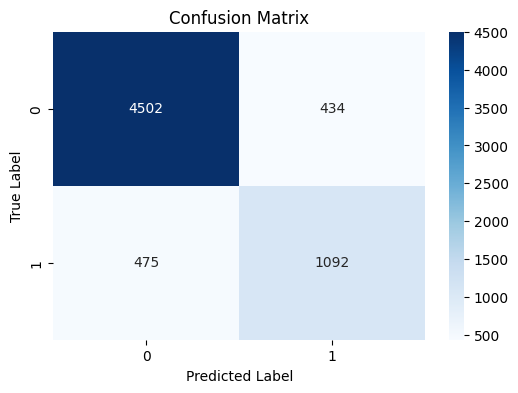

In [90]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



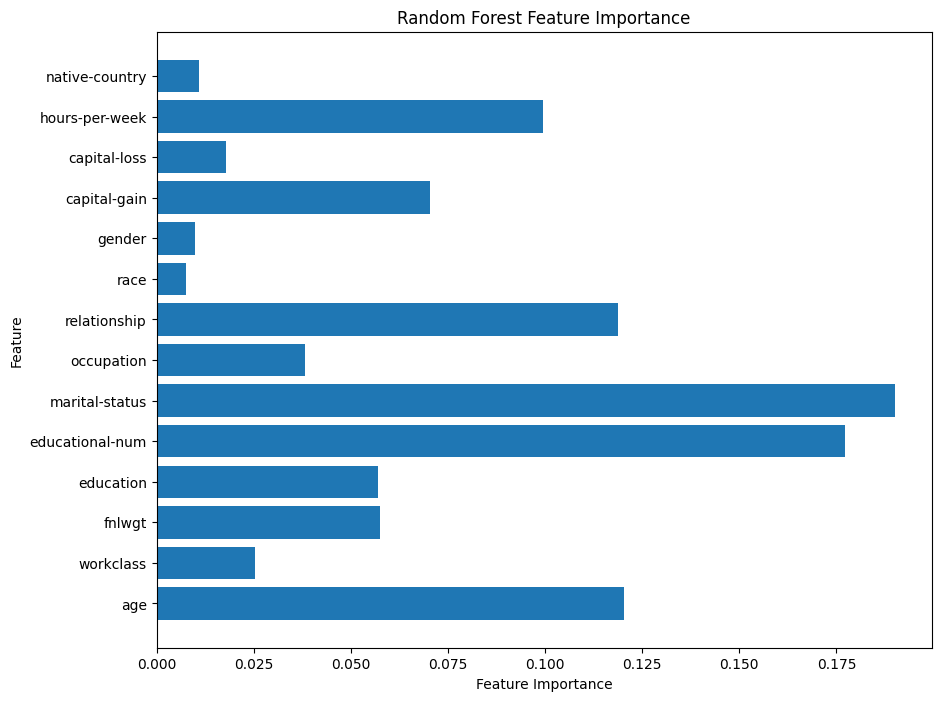

In [88]:

# Feature importance
feature_importance = best_model.feature_importances_

# Plotting the feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), data.drop('income',axis=1).columns)  # Assuming you have a list of feature names
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

It is observed that the martial_status, educational-num, relationship and age are the most important features